# 🔗 Cadeias de Markov - Modelando a Incerteza no Mundo Real

## Essa é a Base de Tudo em Aprendizado por Reforço!

### O Que É Uma Cadeia de Markov?

Uma **Cadeia de Markov** é um modelo matemático para sistemas que evoluem probabilisticamente ao longo do tempo.

**Definição Formal:**
Sistema estocástico onde a probabilidade de transição para o próximo estado **depende APENAS do estado atual**, não do histórico.

$$P(S_{t+1} | S_t, S_{t-1}, ..., S_0) = P(S_{t+1} | S_t)$$

Isso é chamado de **Propriedade de Markov** (ausência de memória)

### Exemplos do Mundo Real

| Exemplo | Estados | Transições |
|---------|---------|-----------|
| 🌦️ **Clima** | Ensolarado, Nublado, Chuvoso | Amanhã depende de hoje |
| 💬 **Redes Sociais** | Online, Offline | Usuário muda status |
| 💰 **Preço de Ação** | Alto, Médio, Baixo | Probabilidades de mudança |
| 🎮 **Videogame** | Estados do jogo | Transições de gameplay |
| 🤖 **Robot** | Posições | Movimento probabilístico |

### Por Que É Importante em RL?

- ✅ Modela ambientes incertos realistically
- ✅ Base teórica para MDPs (Markov Decision Processes)
- ✅ Permite análise matemática (distribuição estacionária)
- ✅ Predição e planejamento baseado em probabilidades

## 1️⃣ Importações e Configuração

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

np.random.seed(42)  # Reprodutibilidade

print("✓ Bibliotecas importadas com sucesso!")

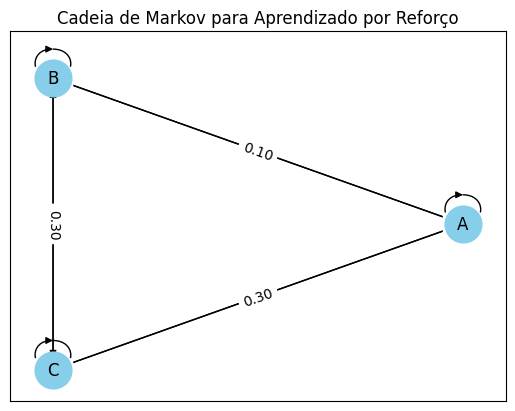

Estado Inicial: A
Transição: A -> C (Probabilidade: 0.10)
Transição: C -> C (Probabilidade: 0.40)
Transição: C -> A (Probabilidade: 0.30)
Transição: A -> A (Probabilidade: 0.70)
Transição: A -> C (Probabilidade: 0.10)
Transição: C -> A (Probabilidade: 0.30)
Transição: A -> A (Probabilidade: 0.70)
Transição: A -> A (Probabilidade: 0.70)
Transição: A -> A (Probabilidade: 0.70)
Transição: A -> C (Probabilidade: 0.10)
Transição: C -> A (Probabilidade: 0.30)
Transição: A -> A (Probabilidade: 0.70)
Transição: A -> B (Probabilidade: 0.20)
Transição: B -> A (Probabilidade: 0.10)
Transição: A -> B (Probabilidade: 0.20)
Transição: B -> B (Probabilidade: 0.60)
Transição: B -> B (Probabilidade: 0.60)
Transição: B -> B (Probabilidade: 0.60)
Transição: B -> C (Probabilidade: 0.30)
Transição: C -> C (Probabilidade: 0.40)


In [ ]:
# ============================================================
# 2️⃣ EXEMPLO 1: Sistema de Clima (Realista e Intuitivo)
# ============================================================

print("\n" + "="*70)
print("EXEMPLO 1: PREVISÃO DE CLIMA COM CADEIA DE MARKOV")
print("="*70 + "\n")

# Estados do clima
climate_states = ['☀️ Ensolarado', '☁️ Nublado', '🌧️ Chuvoso']
state_abbrev = ['Sunny', 'Cloudy', 'Rainy']

# Matriz de Transição (Markov)
# Linha = Estado atual, Coluna = Próximo estado
# Baseado em padrões realistas de clima
P_climate = np.array([
    [0.80, 0.15, 0.05],  # De Ensolarado para: Ensolarado, Nublado, Chuvoso
    [0.40, 0.40, 0.20],  # De Nublado para: Ensolarado, Nublado, Chuvoso
    [0.10, 0.40, 0.50]   # De Chuvoso para: Ensolarado, Nublado, Chuvoso
])

print(f"Matriz de Transição (P):")
print(f"\nDe → Para      {state_abbrev[0]:>8}  {state_abbrev[1]:>8}  {state_abbrev[2]:>8}")
print("-" * 50)
for i, state in enumerate(climate_states):
    print(f"{state:15} {P_climate[i,0]:8.2f}  {P_climate[i,1]:8.2f}  {P_climate[i,2]:8.2f}")

print("\n💡 Interpretação:")
print(f"  • Se está ☀️ Ensolarado, há 80% chance de continuar ensolarado amanhã")
print(f"  • Se está 🌧️ Chuvoso, há 50% chance de continuar chuvoso amanhã")
print(f"  • Padrão realista: sistemas tendem a persistir no estado atual")

# Criar grafo de Markov para clima
G_climate = nx.DiGraph()
G_climate.add_nodes_from(state_abbrev)

for i, from_state in enumerate(state_abbrev):
    for j, to_state in enumerate(state_abbrev):
        if P_climate[i,j] > 0:
            G_climate.add_edge(from_state, to_state, weight=P_climate[i,j])

print("\n✓ Grafo de transição criado!")

In [ ]:
# ============================================================
# 3️⃣ VISUALIZAÇÃO 1: Grafo de Transição
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Gráfico 1: Grafo com Layout Circular ---
ax1 = axes[0]
pos = nx.spring_layout(G_climate, k=2, iterations=50, seed=42)

colors_climate = ['#FFD700', '#87CEEB', '#4169E1']  # Dourado, Azul claro, Azul escuro
nx.draw_networkx_nodes(G_climate, pos, node_size=3000, node_color=colors_climate, 
                       ax=ax1, edgecolors='black', linewidths=2.5)

# Desenhar labels dos estados
node_labels = {abbrev: climate_states[i] for i, abbrev in enumerate(state_abbrev)}
nx.draw_networkx_labels(G_climate, pos, labels=node_labels, font_size=10, 
                       font_weight='bold', ax=ax1)

# Desenhar arestas com espessuras proporcionais às probabilidades
edges = G_climate.edges()
weights = [G_climate[u][v]['weight'] for u, v in edges]

nx.draw_networkx_edges(G_climate, pos, width=[w*5 for w in weights], 
                      edge_color='gray', arrowsize=25, arrowstyle='-|>',
                      arrows=True, ax=ax1, connectionstyle='arc3,rad=0.1')

# Labels das arestas (probabilidades)
edge_labels = {(u, v): f"{G_climate[u][v]['weight']:.0%}" for u, v in G_climate.edges()}
nx.draw_networkx_edge_labels(G_climate, pos, edge_labels=edge_labels, font_size=9, 
                            font_weight='bold', ax=ax1)

ax1.set_title('🌦️ Cadeia de Markov do Clima\n(Visualização em Grafo)', 
             fontsize=13, fontweight='bold', pad=20)
ax1.axis('off')

# --- Gráfico 2: Matriz de Transição em Heatmap ---
ax2 = axes[1]
sns.heatmap(P_climate, annot=True, fmt='.2f', cmap='YlOrRd', cbar_kws={'label': 'Probabilidade'},
           xticklabels=state_abbrev, yticklabels=climate_states, ax=ax2,
           linewidths=2, linecolor='black', cbar=True, vmin=0, vmax=1,
           annot_kws={'size': 11, 'weight': 'bold'})

ax2.set_title('📊 Matriz de Transição (P)\n[De Estado → Para Estado]', 
             fontsize=13, fontweight='bold', pad=20)
ax2.set_xlabel('Próximo Estado', fontweight='bold', fontsize=11)
ax2.set_ylabel('Estado Atual', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("✓ Visualização completa!")

## 2️⃣ Simulação: Trajetórias Aleatórias no Clima

In [ ]:
print("\n" + "="*70)
print("SIMULAÇÃO: SEQUÊNCIA DE DIAS DE CLIMA")
print("="*70 + "\n")

def simulate_markov_chain(P, initial_state=0, num_steps=20):
    """
    Simula transições em uma Cadeia de Markov.
    
    Parâmetros:
    - P: matriz de transição
    - initial_state: índice do estado inicial
    - num_steps: número de passos a simular
    
    Retorno:
    - trajectory: sequência de estados visitados
    """
    trajectory = [initial_state]
    current_state = initial_state
    
    for _ in range(num_steps):
        # Próximo estado baseado na probabilidade
        next_state = np.random.choice(len(P), p=P[current_state])
        trajectory.append(next_state)
        current_state = next_state
    
    return trajectory

# Simular 3 cenários diferentes
num_simulations = 3
num_steps = 14

print(f"Simulando {num_simulations} sequências de {num_steps} dias:\n")

trajectories = []
for sim_idx in range(num_simulations):
    initial_state = np.random.randint(0, 3)
    trajectory = simulate_markov_chain(P_climate, initial_state, num_steps)
    trajectories.append(trajectory)
    
    print(f"Simulação {sim_idx + 1}:")
    print("  ", end="")
    for state in trajectory:
        print(climate_states[state], end=" → ")
    print("...\n")

# Calcular frequências
print("📊 Estatísticas das Simulações:")
print("-" * 70)
all_states = [state for traj in trajectories for state in traj]
for i, state in enumerate(climate_states):
    count = all_states.count(i)
    pct = count / len(all_states) * 100
    print(f"{state:15} {count:3d} ocorrências ({pct:.1f}%)")

## 3️⃣ Visualização: Trajetórias no Tempo

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

colors = ['#FFD700', '#87CEEB', '#4169E1']
color_names = ['Ensolarado', 'Nublado', 'Chuvoso']

# --- Gráfico 1: Trajetórias Individuais ---
for sim_idx, trajectory in enumerate(trajectories):
    state_indices = trajectory
    ax1.plot(range(len(state_indices)), state_indices, 'o-', linewidth=2.5, 
            markersize=8, label=f'Simulação {sim_idx + 1}', alpha=0.7)

ax1.set_yticks([0, 1, 2])
ax1.set_yticklabels(climate_states, fontsize=10)
ax1.set_xlabel('Dia', fontweight='bold', fontsize=11)
ax1.set_title('Trajetórias de Clima ao Longo do Tempo\n(Simulações Repetidas)', 
             fontweight='bold', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right', fontsize=10)
ax1.set_ylim(-0.5, 2.5)

# --- Gráfico 2: Distribuição de Frequências ---
all_states = [state for traj in trajectories for state in traj]
state_counts = [all_states.count(i) for i in range(3)]

bars = ax2.bar(climate_states, state_counts, color=colors, edgecolor='black', linewidth=2)
ax2.set_ylabel('Frequência (# Ocorrências)', fontweight='bold', fontsize=11)
ax2.set_title('Distribuição de Estados nas Simulações', fontweight='bold', fontsize=12)
ax2.grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for bar, count in zip(bars, state_counts):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{count}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("✓ Trajetórias visualizadas!")

## 4️⃣ Análise Matemática: Distribuição Estacionária

### Um Conceito Fundamental

A **Distribuição Estacionária** (ou distribuição de equilíbrio) é a distribuição de probabilidades que:
- Não muda com o tempo
- É atingida independentemente do estado inicial
- Satisfaz: π = π · P

Onde **π** é um vetor de probabilidades e **P** é a matriz de transição.

**Interpretação:** Se deixarmos a Cadeia de Markov rodar por infinito tempo, teremos estas proporções de tempo em cada estado.

### Cálculo: Autovetor Principal

A distribuição estacionária é o **autovetor esquerdo** de P com autovalor 1:
$$\pi · P = \pi$$

In [ ]:
print("\n" + "="*70)
print("DISTRIBUIÇÃO ESTACIONÁRIA DO CLIMA")
print("="*70 + "\n")

# Método 1: Cálculo via Autovetor (Exato)
# π P = π  =>  π (P - I) = 0  =>  π é o autovetor esquerdo para autovalor 1

# Transpor para achar autovetor direito
eigenvalues, eigenvectors = np.linalg.eig(P_climate.T)

# Encontrar o índice do autovalor 1
idx = np.argmax(np.abs(eigenvalues - 1.0) < 1e-8)
stationary = np.real(eigenvectors[:, idx])
stationary = stationary / stationary.sum()  # Normalizar

# Método 2: Simulação de Longa Duração
print("Calculando via Simulação de Longa Duração...\n")
long_trajectory = simulate_markov_chain(P_climate, initial_state=0, num_steps=10000)
simulated_dist = np.array([long_trajectory.count(i) for i in range(3)]) / len(long_trajectory)

print("📊 RESULTADOS:")
print("-" * 70)
print(f"\n{'Estado':<15} {'Teórico':>12} {'Simulado':>12} {'Diferença':>12}")
print("-" * 70)

for i, state in enumerate(climate_states):
    theo = stationary[i]
    sim = simulated_dist[i]
    diff = abs(theo - sim)
    print(f"{state:<15} {theo:>11.4f}  {sim:>11.4f}  {diff:>11.4f}")

print("\n💡 Interpretação:")
print(f"  • A longo prazo, espera-se que o clima seja:")
for i, state in enumerate(climate_states):
    print(f"    - {state}: {stationary[i]*100:.1f}% do tempo")

print(f"\n  • Mesmo começando em qualquer estado, eventualmente convergirá para esto!")
print(f"  • Isto é independente das condições iniciais!")

## 5️⃣ Visualização: Convergência para Distribuição Estacionária

In [ ]:
# Calcular convergência para diferentes durações
durations = [10, 50, 100, 500, 1000, 5000]
distributions = []

for dur in durations:
    traj = simulate_markov_chain(P_climate, initial_state=0, num_steps=dur)
    dist = np.array([traj.count(i) for i in range(3)]) / len(traj)
    distributions.append(dist)

# Criar visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Convergência ao longo do tempo
ax1 = axes[0]
for i in range(3):
    values = [distributions[j][i] for j in range(len(durations))]
    ax1.plot(durations, values, 'o-', linewidth=2.5, markersize=8, label=climate_states[i])
    ax1.axhline(y=stationary[i], color=f'C{i}', linestyle='--', alpha=0.5, linewidth=2)

ax1.set_xscale('log')
ax1.set_xlabel('Número de Passos (log)', fontweight='bold', fontsize=11)
ax1.set_ylabel('Probabilidade', fontweight='bold', fontsize=11)
ax1.set_title('Convergência para Distribuição Estacionária\n(Linhas tracejadas = Teórico)', 
             fontweight='bold', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10)
ax1.set_ylim(0, 0.6)

# Gráfico 2: Comparação Teórico vs Simulado
ax2 = axes[1]
x_pos = np.arange(len(climate_states))
width = 0.35

bars1 = ax2.bar(x_pos - width/2, stationary, width, label='Teórico', 
               color=['#FFD700', '#87CEEB', '#4169E1'], edgecolor='black', linewidth=2)
bars2 = ax2.bar(x_pos + width/2, distributions[-1], width, label='Simulado (10000 passos)',
               color=['#FFA500', '#87CEEB', '#00008B'], alpha=0.7, edgecolor='black', linewidth=2)

ax2.set_ylabel('Probabilidade', fontweight='bold', fontsize=11)
ax2.set_title('Distribuição Estacionária Teórica vs Simulada', fontweight='bold', fontsize=12)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(climate_states, fontsize=10)
ax2.legend(fontsize=10)
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim(0, 0.6)

# Adicionar valores nas barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("✓ Convergência visualizada!")

## 6️⃣ EXEMPLO 2: Comportamento do Usuário em App (Estado Online/Offline)

In [ ]:
print("\n" + "="*70)
print("EXEMPLO 2: USUÁRIO ONLINE/OFFLINE EM REDE SOCIAL")
print("="*70 + "\n")

# Estados: Online, Offline, Sleep
user_states = ['💬 Online', '🚫 Offline', '💤 Dormindo']
user_abbrev = ['Online', 'Offline', 'Sleep']

# Matriz de Transição realista para usuário de rede social
P_user = np.array([
    [0.50, 0.40, 0.10],  # De Online: continua, vai offline, dorme
    [0.30, 0.60, 0.10],  # De Offline: volta, fica offline, dorme
    [0.05, 0.15, 0.80]   # De Dormindo: acorda e fica online, offline, continua dormindo
])

print(f\"Matriz de Transição do Usuário:\")
print(f\"\\nDe → Para      {user_abbrev[0]:>8}  {user_abbrev[1]:>8}  {user_abbrev[2]:>8}\")
print(\"-\" * 50)
for i, state in enumerate(user_states):
    print(f\"{state:15} {P_user[i,0]:8.2f}  {P_user[i,1]:8.2f}  {P_user[i,2]:8.2f}\")

# Criar grafo
G_user = nx.DiGraph()
G_user.add_nodes_from(user_abbrev)

for i, from_state in enumerate(user_abbrev):
    for j, to_state in enumerate(user_abbrev):
        if P_user[i,j] > 0:
            G_user.add_edge(from_state, to_state, weight=P_user[i,j])

# Calcular distribuição estacionária do usuário
eigenvalues_user, eigenvectors_user = np.linalg.eig(P_user.T)
idx_user = np.argmax(np.abs(eigenvalues_user - 1.0) < 1e-8)
stationary_user = np.real(eigenvectors_user[:, idx_user])
stationary_user = stationary_user / stationary_user.sum()

print(f\"\\n📊 Distribuição Estacionária (Probabilidades a Longo Prazo):\")
print(\"-\" * 50)
for i, state in enumerate(user_states):
    print(f\"{state:20} {stationary_user[i]*100:>6.2f}%\")

print(f\"\\n💡 Interpretação para Negócios:\")
print(f\"  • Um usuário típico passa ~{stationary_user[0]*100:.1f}% do tempo online\")
print(f\"  • ~{stationary_user[1]*100:.1f}% offline (desconectado)\")
print(f\"  • ~{stationary_user[2]*100:.1f}% dormindo\")
print(f\"  • Útil para: schedular notificações, prever tempo de resposta, etc!\")

## 7️⃣ Comparação Lado a Lado: Clima vs Usuário

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# --- Linha 1: Matrizes de Transição ---
# Clima
sns.heatmap(P_climate, annot=True, fmt='.2f', cmap='YlOrRd', 
           xticklabels=state_abbrev, yticklabels=['Sun', 'Cloud', 'Rain'],
           ax=axes[0,0], cbar_kws={'label': 'P'}, linewidths=2, linecolor='black',
           annot_kws={'size': 10, 'weight': 'bold'}, vmin=0, vmax=1)
axes[0,0].set_title('🌦️ Matriz P - Clima', fontweight='bold', fontsize=12)
axes[0,0].set_xlabel('Próximo Estado', fontweight='bold')
axes[0,0].set_ylabel('Estado Atual', fontweight='bold')

# Usuário
sns.heatmap(P_user, annot=True, fmt='.2f', cmap='Blues',
           xticklabels=user_abbrev, yticklabels=['Online', 'Offline', 'Sleep'],
           ax=axes[0,1], cbar_kws={'label': 'P'}, linewidths=2, linecolor='black',
           annot_kws={'size': 10, 'weight': 'bold'}, vmin=0, vmax=1)
axes[0,1].set_title('💬 Matriz P - Usuário', fontweight='bold', fontsize=12)
axes[0,1].set_xlabel('Próximo Estado', fontweight='bold')
axes[0,1].set_ylabel('Estado Atual', fontweight='bold')

# --- Linha 2: Distribuições Estacionárias ---
# Clima
colors_chart = ['#FFD700', '#87CEEB', '#4169E1']
bars1 = axes[1,0].bar(['Sun', 'Cloud', 'Rain'], stationary, color=colors_chart, 
                      edgecolor='black', linewidth=2)
axes[1,0].set_ylabel('Probabilidade', fontweight='bold', fontsize=11)
axes[1,0].set_title('🌦️ Distribuição Estacionária - Clima', fontweight='bold', fontsize=12)
axes[1,0].set_ylim(0, 0.6)
axes[1,0].grid(axis='y', alpha=0.3)

for bar, val in zip(bars1, stationary):
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2, height,
                  f'{val:.3f}', ha='center', va='bottom', fontweight='bold')

# Usuário
colors_user_chart = ['#FF6B6B', '#4ECDC4', '#95E1D3']
bars2 = axes[1,1].bar(['Online', 'Offline', 'Sleep'], stationary_user, 
                      color=colors_user_chart, edgecolor='black', linewidth=2)
axes[1,1].set_ylabel('Probabilidade', fontweight='bold', fontsize=11)
axes[1,1].set_title('💬 Distribuição Estacionária - Usuário', fontweight='bold', fontsize=12)
axes[1,1].set_ylim(0, 0.6)
axes[1,1].grid(axis='y', alpha=0.3)

for bar, val in zip(bars2, stationary_user):
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2, height,
                  f'{val:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Comparação visual completa!")

## 8️⃣ Previsões Multi-Passos: Predição Futura

### Conceito: Poder Preditivo das Cadeias de Markov

Se multiplicarmos a matriz P por ela mesma (P²), obtemos as probabilidades de 2 passos:

$$P^{(n)} = P^n$$

**Aplicação Prática:**
- P¹: onde você estará amanhã
- P²: onde você estará em 2 dias
- P⁷: onde você estará em uma semana
- P³⁶⁵: onde você estará em um ano

**Para o Clima:**
Se hoje é ensolarado, qual é a probabilidade de que em 7 dias seja chuvoso?

In [ ]:
print("\n" + "="*70)
print("PREVISÕES MULTI-PASSOS")
print("="*70 + "\n")

# Calcular P^n para n = 1, 2, 3, 7, 30
steps = [1, 2, 3, 7, 14, 30]
initial_state = [1, 0, 0]  # Começando em "Ensolarado"

print("Cenário: Começar em ☀️ ENSOLARADO\n")
print(f"{'Dias':>6} | {'Ensolarado':>16} | {'Nublado':>16} | {'Chuvoso':>16}")
print("-" * 66)

for n in steps:
    P_n = np.linalg.matrix_power(P_climate, n)
    probs = initial_state @ P_n  # state @ P^n
    
    print(f"{n:>6} | {probs[0]:>15.4f}  | {probs[1]:>15.4f}  | {probs[2]:>15.4f}")

print(f"\n💡 Observações:\")
print(f"  • Dia 1: Muito provável continuar ensolarado (80%)")
print(f"  • Dia 7: Probabilidades começam a se balancear")
print(f"  • Dia 30: Aproxima-se da distribuição estacionária")
print(f"  • O poder preditivo diminui com o tempo (uncertainty cresce)")

# Visualizar
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Evolução das probabilidades ao longo do tempo
steps_continuous = range(1, 31)
probs_sunny = []
probs_cloudy = []
probs_rainy = []

for n in steps_continuous:
    P_n = np.linalg.matrix_power(P_climate, n)
    probs = initial_state @ P_n
    probs_sunny.append(probs[0])
    probs_cloudy.append(probs[1])
    probs_rainy.append(probs[2])

axes[0].plot(steps_continuous, probs_sunny, 'o-', linewidth=2.5, markersize=6, label='Ensolarado')
axes[0].plot(steps_continuous, probs_cloudy, 's-', linewidth=2.5, markersize=6, label='Nublado')
axes[0].plot(steps_continuous, probs_rainy, '^-', linewidth=2.5, markersize=6, label='Chuvoso')

# Linhas horizontais para distribuição estacionária
for i, val in enumerate(stationary):
    axes[0].axhline(y=val, color=f'C{i}', linestyle='--', alpha=0.3, linewidth=2)

axes[0].set_xlabel('Dias para o Futuro', fontweight='bold', fontsize=11)
axes[0].set_ylabel('Probabilidade', fontweight='bold', fontsize=11)
axes[0].set_title('Evolução das Probabilidades (Começando em Ensolarado)', 
                 fontweight='bold', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=10, loc='best')
axes[0].set_ylim(0, 1)

# Gráfico 2: Comparação de dia específicos
specific_days = [1, 3, 7, 14, 30]
specific_probs = []

for day in specific_days:
    P_n = np.linalg.matrix_power(P_climate, day)
    probs = initial_state @ P_n
    specific_probs.append(probs)

x = np.arange(len(specific_days))
width = 0.25

bars1 = axes[1].bar(x - width, [p[0] for p in specific_probs], width, 
                   label='Ensolarado', color='#FFD700', edgecolor='black', linewidth=1.5)
bars2 = axes[1].bar(x, [p[1] for p in specific_probs], width,
                   label='Nublado', color='#87CEEB', edgecolor='black', linewidth=1.5)
bars3 = axes[1].bar(x + width, [p[2] for p in specific_probs], width,
                   label='Chuvoso', color='#4169E1', edgecolor='black', linewidth=1.5)

axes[1].set_xlabel('Dias para o Futuro', fontweight='bold', fontsize=11)
axes[1].set_ylabel('Probabilidade', fontweight='bold', fontsize=11)
axes[1].set_title('Comparação: Probabilidades em Dias Específicos', fontweight='bold', fontsize=12)
axes[1].set_xticks(x)
axes[1].set_xticklabels([f'{d}d' for d in specific_days])
axes[1].legend(fontsize=10)
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_ylim(0, 0.8)

plt.tight_layout()
plt.show()

print("\n✓ Previsões calculadas e visualizadas!")

## 9️⃣ Conexão com Aprendizado por Reforço

### Por que Cadeias de Markov são Fundamentais em RL?

#### 1️⃣ **Base Teórica: MDPs (Markov Decision Processes)**

Uma Cadeia de Markov é o **bloco de construção** para MDPs:

| Elemento | Cadeia de Markov | MDP | RL |
|----------|------------------|-----|-----|
| **Estados** | Fixos | Fixos | Aprendidos ou explorados |
| **Transições** | Probabilísticas | Determinísticas + ações | Aprendidas com ações |
| **Objetivo** | Análise | Otimizar recompensa | Maximizar ganho cumulativo |

#### 2️⃣ **Propriedade de Markov é ESSENCIAL**

A ausência de memória (propriedade de Markov) permite:
- ✅ Formulação recursiva (Equação de Bellman)
- ✅ Algoritmos eficientes (DP, Q-Learning)
- ✅ Análise teórica garantida

**Se violarmos a propriedade de Markov, os algoritmos falham!**

#### 3️⃣ **Exemplos em RL Real:**

- 🎮 **Games**: Estado atual (posição, saúde) → Próximo estado (após ação)
- 🤖 **Robótica**: Posição → Próxima posição (após motor)
- 💰 **Trading**: Preço atual → Próximo preço (após ordem)
- 🚗 **Autonomous Driving**: Posição do carro → Próxima posição

#### 4️⃣ **Distribuição Estacionária em RL**

- Útil para análise de **políticas de longo prazo**
- Predizer estados em que um agente passará mais tempo
- Validar que a política não converge para estados ruins

### Próximas Etapas: Do Markov para RL

1. **Cadeias de Markov** (você está aqui! ✓)
   - ↓
2. **MDPs**: Adicionar ações e recompensas
   - ↓
3. **Value Iteration / Policy Iteration**: Encontrar política ótima
   - ↓
4. **Q-Learning**: Aprender sem conhecer o modelo
   - ↓
5. **Deep RL**: Usar redes neurais para estados complexos

## 🔟 Resumo e Desafios

### ✅ O Que Aprendemos

1. **Cadeias de Markov modelam transições probabilísticas**
   - Propriedade de Markov: depender apenas do estado atual
   - Matriz de transição P define as probabilidades

2. **Distribuição Estacionária (π)**
   - Probabilidades de longo prazo
   - Independente do estado inicial
   - Calculável via autovetor: π·P = π

3. **Previsões Multi-Passo**
   - P^n dá probabilidades após n passos
   - Poder preditivo diminui com o tempo
   - Converge para distribuição estacionária

4. **Aplicações Práticas Reais**
   - Meteorologia (previsão de clima)
   - Social Media (comportamento de usuário)
   - Finanças (preço de ações)
   - Gamification & Recomendação

### 🚀 Desafios Práticos

#### **Desafio 1: Modificar o Modelo do Clima**
Suponha que aquecimento global causa:
- De frio → quente: aumente de 0.1 para 0.3
- De frio → chuva: aumente de 0.05 para 0.15

Como isso afeta a distribuição estacionária?

#### **Desafio 2: Criar outro Exemplo**
Defina uma Cadeia de Markov para:
- Emoções humanas (Feliz, Neutro, Triste)
- Ou: Estado de bateria (Carregando, Usando, Baixa)
- Ou: Comportamento de compra (Pesquisando, Comprando, Descansando)

#### **Desafio 3: Encontrar Padrões**
Qual é a probabilidade de:
- 3 dias ensolarados seguidos começando de "Ensolarado"?
- Simulação vs Fórmula (P³)

#### **Desafio 4: Classificação Incorreta** ⚠️
Se alguém disser "o clima amanhã depende dos últimos 30 dias", isto viola a propriedade de Markov. Por que isso é um problema para RL?

### 📚 Recursos Adicionais

- **Livro** Sutton & Barto: "Reinforcement Learning" (Cap. 2-3)
- **Curso** MIT OCW: Markov Decision Processes
- **Artigo** "A Tutorial on Markov Chains" (Princeton)
- **Código** GitHub Openai/baselines (implementações reais)

---

## 🎓 Conclusão

> **"Cadeias de Markov são o idioma matemático para descrever incerteza sequencial. Dominar esse conceito é dominar o coração de RL."**

Você agora compreende:
- ✅ Como sistemas probabilísticos evoluem no tempo
- ✅ Como prever distribuições futuras
- ✅ Como a matemática subjacente funciona
- ✅ Aplicações práticas reais

**Próximo passo:** Estude MDPs, onde adicionaremos **ações** e **recompensas** às Cadeias de Markov!

In [ ]:
print("\n" + "="*70)
print("✅ NOTEBOOK DE CADEIAS DE MARKOV COMPLETO!")
print("="*70)
print(f"\nSeções Cobertas:")
print(f"  1️⃣  Importações e Configuração")
print(f"  2️⃣  Exemplo 1: Clima (Conceitos Fundamentais)")
print(f"  3️⃣  Visualização: Grafo + Heatmap")
print(f"  4️⃣  Simulação: Trajetórias Aleatórias")
print(f"  5️⃣  Distribuição Estacionária (Teórico + Simulado)")
print(f"  6️⃣  Convergência Visual")
print(f"  7️⃣  Exemplo 2: Comportamento de Usuário")
print(f"  8️⃣  Comparação Lado-a-Lado")
print(f"  9️⃣  Previsões Multi-Passos")
print(f"  🔟 Conexão com RL + Desafios")
print("\n" + "="*70)
print("Você está pronto para MDPs e Aprendizado por Reforço! 🚀")
print("="*70)